<a href="https://colab.research.google.com/github/ZackPashkin/colab-snippets-ngrok-flask/blob/main/How_to_display_image_flask_ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is ngrok? 
Securely expose a local web server to the internet and capture all traffic for detailed inspection and replay. ngrok is a reverse proxy that creates a secure tunnel between from a public endpoint to a locally running web service. ngrok captures and analyzes all traffic over the tunnel for later inspection and replay.



In [ ]:
# installation
!pip install flask==0.12.2
!pip install flask-ngrok

     |████████████████████████████████| 92kB 4.1MB/s 
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2


In [ ]:
# dataset example
!gdown https://drive.google.com/uc?id=1zv-9NHLLzWCANumdsNtwDK1WV549b270 
!mkdir /content/static
!unzip -qq /content/test.zip -d /content/static


Downloading...
From: https://drive.google.com/uc?id=1zv-9NHLLzWCANumdsNtwDK1WV549b270
To: /content/test.zip
295MB [00:02, 126MB/s]


In [ ]:
!mkdir templates
%cd /content/templates


html = """
 <!DOCTYPE html>
<html>
<head>
    <title> Hello World!</title>
    <h1> Hello World! </h1>
</head>
<body>
    <img src="{{ user_image }}" alt="User Image">
</body>
</html>"""

with open("index.html","a+") as f:
  f.write(html)

%cd /content

mkdir: cannot create directory ‘templates’: File exists
/content/templates
/content


In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template
import os

IMAGE_FOLDER = os.path.join('static', 'test')

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = IMAGE_FOLDER

#starts ngrok when the app is run
run_with_ngrok(app)   



@app.route("/")
def home():
    full_filename = os.path.join(app.config['UPLOAD_FOLDER'], os.listdir(IMAGE_FOLDER)[0])
    return render_template("index.html", user_image = full_filename)
app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8fa63eec3fe0.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/Mar/2021 13:26:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 13:26:09] "GET /static/test/384818.jpg HTTP/1.1" 200 -
127.0.0.1 - - [04/Mar/2021 13:26:10] "GET /favicon.ico HTTP/1.1" 404 -


## page should look like:
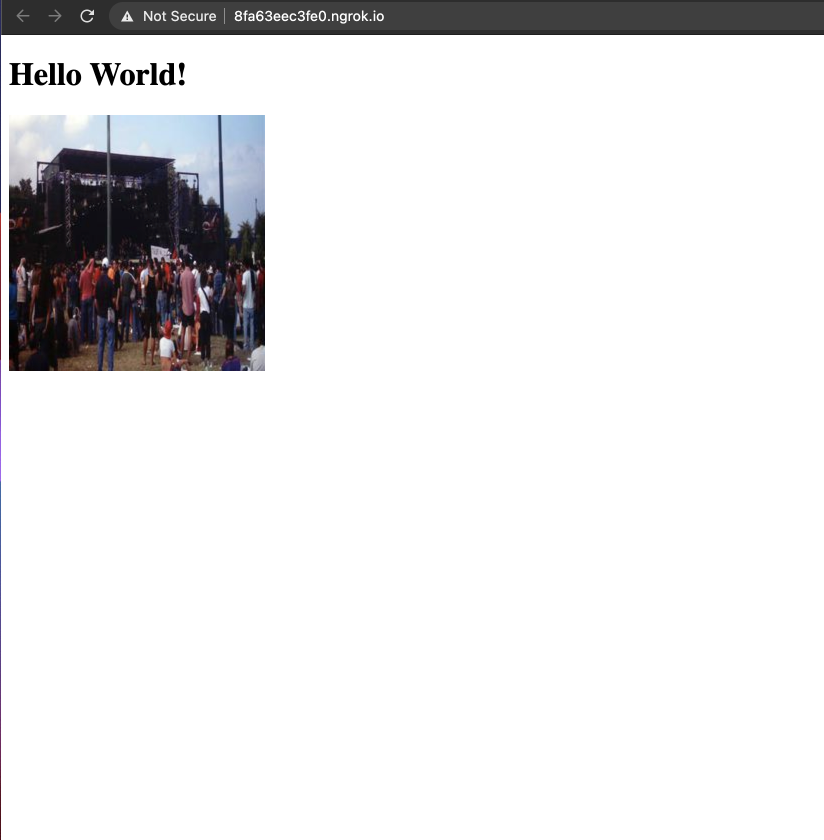